In [1]:
#@title Import libraries
import cv2
from matplotlib import pyplot
from matplotlib.image import imread
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Visualizing

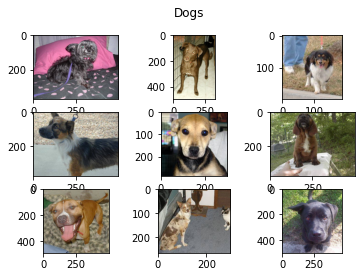

In [2]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'data/Petimages/'
# plot first few images
pyplot.suptitle('Dogs')
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Dog/dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# credit to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

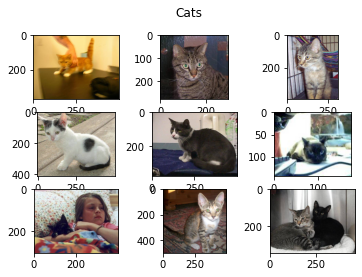

In [3]:
# plot dog photos from the dogs vs cats dataset
# plot first few images
pyplot.suptitle('Cats')
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Cat/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# credit to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

we can see that we have uneven picture shape so we should do resizing to images

In [4]:
images_cat = []
images_dog = []
for i in range(0,12499):
    image = cv2.imread(folder + 'Cat/cat.' + str(i) + '.jpg', cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (45,45))
    image = np.array(image)
    images_cat.append(image)
    image = cv2.imread(folder + 'Dog/dog.' + str(i) + '.jpg', cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,(45,45))
    image = np.array(image)
    images_dog.append(image)  
    print(image.shape, i)

(45, 45) 0
(45, 45) 1
(45, 45) 2
(45, 45) 3
(45, 45) 4
(45, 45) 5
(45, 45) 6
(45, 45) 7
(45, 45) 8
(45, 45) 9
(45, 45) 10
(45, 45) 11
(45, 45) 12
(45, 45) 13
(45, 45) 14
(45, 45) 15
(45, 45) 16
(45, 45) 17
(45, 45) 18
(45, 45) 19
(45, 45) 20
(45, 45) 21
(45, 45) 22
(45, 45) 23
(45, 45) 24
(45, 45) 25
(45, 45) 26
(45, 45) 27
(45, 45) 28
(45, 45) 29
(45, 45) 30
(45, 45) 31
(45, 45) 32
(45, 45) 33
(45, 45) 34
(45, 45) 35
(45, 45) 36
(45, 45) 37
(45, 45) 38
(45, 45) 39
(45, 45) 40
(45, 45) 41
(45, 45) 42
(45, 45) 43
(45, 45) 44
(45, 45) 45
(45, 45) 46
(45, 45) 47
(45, 45) 48
(45, 45) 49
(45, 45) 50
(45, 45) 51
(45, 45) 52
(45, 45) 53
(45, 45) 54
(45, 45) 55
(45, 45) 56
(45, 45) 57
(45, 45) 58
(45, 45) 59
(45, 45) 60
(45, 45) 61
(45, 45) 62
(45, 45) 63
(45, 45) 64
(45, 45) 65
(45, 45) 66
(45, 45) 67
(45, 45) 68
(45, 45) 69
(45, 45) 70
(45, 45) 71
(45, 45) 72
(45, 45) 73
(45, 45) 74
(45, 45) 75
(45, 45) 76
(45, 45) 77
(45, 45) 78
(45, 45) 79
(45, 45) 80
(45, 45) 81
(45, 45) 82
(45, 45) 83
(4

(45, 45) 642
(45, 45) 643
(45, 45) 644
(45, 45) 645
(45, 45) 646
(45, 45) 647
(45, 45) 648
(45, 45) 649
(45, 45) 650
(45, 45) 651
(45, 45) 652
(45, 45) 653
(45, 45) 654
(45, 45) 655
(45, 45) 656
(45, 45) 657
(45, 45) 658
(45, 45) 659
(45, 45) 660
(45, 45) 661
(45, 45) 662
(45, 45) 663
(45, 45) 664
(45, 45) 665
(45, 45) 666
(45, 45) 667
(45, 45) 668
(45, 45) 669
(45, 45) 670
(45, 45) 671
(45, 45) 672
(45, 45) 673
(45, 45) 674
(45, 45) 675
(45, 45) 676
(45, 45) 677
(45, 45) 678
(45, 45) 679
(45, 45) 680
(45, 45) 681
(45, 45) 682
(45, 45) 683
(45, 45) 684
(45, 45) 685
(45, 45) 686
(45, 45) 687
(45, 45) 688
(45, 45) 689
(45, 45) 690
(45, 45) 691
(45, 45) 692
(45, 45) 693
(45, 45) 694
(45, 45) 695
(45, 45) 696
(45, 45) 697
(45, 45) 698
(45, 45) 699
(45, 45) 700
(45, 45) 701
(45, 45) 702
(45, 45) 703
(45, 45) 704
(45, 45) 705
(45, 45) 706
(45, 45) 707
(45, 45) 708
(45, 45) 709
(45, 45) 710
(45, 45) 711
(45, 45) 712
(45, 45) 713
(45, 45) 714
(45, 45) 715
(45, 45) 716
(45, 45) 717
(45, 45) 718

(45, 45) 1255
(45, 45) 1256
(45, 45) 1257
(45, 45) 1258
(45, 45) 1259
(45, 45) 1260
(45, 45) 1261
(45, 45) 1262
(45, 45) 1263
(45, 45) 1264
(45, 45) 1265
(45, 45) 1266
(45, 45) 1267
(45, 45) 1268
(45, 45) 1269
(45, 45) 1270
(45, 45) 1271
(45, 45) 1272
(45, 45) 1273
(45, 45) 1274
(45, 45) 1275
(45, 45) 1276
(45, 45) 1277
(45, 45) 1278
(45, 45) 1279
(45, 45) 1280
(45, 45) 1281
(45, 45) 1282
(45, 45) 1283
(45, 45) 1284
(45, 45) 1285
(45, 45) 1286
(45, 45) 1287
(45, 45) 1288
(45, 45) 1289
(45, 45) 1290
(45, 45) 1291
(45, 45) 1292
(45, 45) 1293
(45, 45) 1294
(45, 45) 1295
(45, 45) 1296
(45, 45) 1297
(45, 45) 1298
(45, 45) 1299
(45, 45) 1300
(45, 45) 1301
(45, 45) 1302
(45, 45) 1303
(45, 45) 1304
(45, 45) 1305
(45, 45) 1306
(45, 45) 1307
(45, 45) 1308
(45, 45) 1309
(45, 45) 1310
(45, 45) 1311
(45, 45) 1312
(45, 45) 1313
(45, 45) 1314
(45, 45) 1315
(45, 45) 1316
(45, 45) 1317
(45, 45) 1318
(45, 45) 1319
(45, 45) 1320
(45, 45) 1321
(45, 45) 1322
(45, 45) 1323
(45, 45) 1324
(45, 45) 1325
(45, 4

(45, 45) 1851
(45, 45) 1852
(45, 45) 1853
(45, 45) 1854
(45, 45) 1855
(45, 45) 1856
(45, 45) 1857
(45, 45) 1858
(45, 45) 1859
(45, 45) 1860
(45, 45) 1861
(45, 45) 1862
(45, 45) 1863
(45, 45) 1864
(45, 45) 1865
(45, 45) 1866
(45, 45) 1867
(45, 45) 1868
(45, 45) 1869
(45, 45) 1870
(45, 45) 1871
(45, 45) 1872
(45, 45) 1873
(45, 45) 1874
(45, 45) 1875
(45, 45) 1876
(45, 45) 1877
(45, 45) 1878
(45, 45) 1879
(45, 45) 1880
(45, 45) 1881
(45, 45) 1882
(45, 45) 1883
(45, 45) 1884
(45, 45) 1885
(45, 45) 1886
(45, 45) 1887
(45, 45) 1888
(45, 45) 1889
(45, 45) 1890
(45, 45) 1891
(45, 45) 1892
(45, 45) 1893
(45, 45) 1894
(45, 45) 1895
(45, 45) 1896
(45, 45) 1897
(45, 45) 1898
(45, 45) 1899
(45, 45) 1900
(45, 45) 1901
(45, 45) 1902
(45, 45) 1903
(45, 45) 1904
(45, 45) 1905
(45, 45) 1906
(45, 45) 1907
(45, 45) 1908
(45, 45) 1909
(45, 45) 1910
(45, 45) 1911
(45, 45) 1912
(45, 45) 1913
(45, 45) 1914
(45, 45) 1915
(45, 45) 1916
(45, 45) 1917
(45, 45) 1918
(45, 45) 1919
(45, 45) 1920
(45, 45) 1921
(45, 4

(45, 45) 2441
(45, 45) 2442
(45, 45) 2443
(45, 45) 2444
(45, 45) 2445
(45, 45) 2446
(45, 45) 2447
(45, 45) 2448
(45, 45) 2449
(45, 45) 2450
(45, 45) 2451
(45, 45) 2452
(45, 45) 2453
(45, 45) 2454
(45, 45) 2455
(45, 45) 2456
(45, 45) 2457
(45, 45) 2458
(45, 45) 2459
(45, 45) 2460
(45, 45) 2461
(45, 45) 2462
(45, 45) 2463
(45, 45) 2464
(45, 45) 2465
(45, 45) 2466
(45, 45) 2467
(45, 45) 2468
(45, 45) 2469
(45, 45) 2470
(45, 45) 2471
(45, 45) 2472
(45, 45) 2473
(45, 45) 2474
(45, 45) 2475
(45, 45) 2476
(45, 45) 2477
(45, 45) 2478
(45, 45) 2479
(45, 45) 2480
(45, 45) 2481
(45, 45) 2482
(45, 45) 2483
(45, 45) 2484
(45, 45) 2485
(45, 45) 2486
(45, 45) 2487
(45, 45) 2488
(45, 45) 2489
(45, 45) 2490
(45, 45) 2491
(45, 45) 2492
(45, 45) 2493
(45, 45) 2494
(45, 45) 2495
(45, 45) 2496
(45, 45) 2497
(45, 45) 2498
(45, 45) 2499
(45, 45) 2500
(45, 45) 2501
(45, 45) 2502
(45, 45) 2503
(45, 45) 2504
(45, 45) 2505
(45, 45) 2506
(45, 45) 2507
(45, 45) 2508
(45, 45) 2509
(45, 45) 2510
(45, 45) 2511
(45, 4

(45, 45) 3027
(45, 45) 3028
(45, 45) 3029
(45, 45) 3030
(45, 45) 3031
(45, 45) 3032
(45, 45) 3033
(45, 45) 3034
(45, 45) 3035
(45, 45) 3036
(45, 45) 3037
(45, 45) 3038
(45, 45) 3039
(45, 45) 3040
(45, 45) 3041
(45, 45) 3042
(45, 45) 3043
(45, 45) 3044
(45, 45) 3045
(45, 45) 3046
(45, 45) 3047
(45, 45) 3048
(45, 45) 3049
(45, 45) 3050
(45, 45) 3051
(45, 45) 3052
(45, 45) 3053
(45, 45) 3054
(45, 45) 3055
(45, 45) 3056
(45, 45) 3057
(45, 45) 3058
(45, 45) 3059
(45, 45) 3060
(45, 45) 3061
(45, 45) 3062
(45, 45) 3063
(45, 45) 3064
(45, 45) 3065
(45, 45) 3066
(45, 45) 3067
(45, 45) 3068
(45, 45) 3069
(45, 45) 3070
(45, 45) 3071
(45, 45) 3072
(45, 45) 3073
(45, 45) 3074
(45, 45) 3075
(45, 45) 3076
(45, 45) 3077
(45, 45) 3078
(45, 45) 3079
(45, 45) 3080
(45, 45) 3081
(45, 45) 3082
(45, 45) 3083
(45, 45) 3084
(45, 45) 3085
(45, 45) 3086
(45, 45) 3087
(45, 45) 3088
(45, 45) 3089
(45, 45) 3090
(45, 45) 3091
(45, 45) 3092
(45, 45) 3093
(45, 45) 3094
(45, 45) 3095
(45, 45) 3096
(45, 45) 3097
(45, 4

(45, 45) 3619
(45, 45) 3620
(45, 45) 3621
(45, 45) 3622
(45, 45) 3623
(45, 45) 3624
(45, 45) 3625
(45, 45) 3626
(45, 45) 3627
(45, 45) 3628
(45, 45) 3629
(45, 45) 3630
(45, 45) 3631
(45, 45) 3632
(45, 45) 3633
(45, 45) 3634
(45, 45) 3635
(45, 45) 3636
(45, 45) 3637
(45, 45) 3638
(45, 45) 3639
(45, 45) 3640
(45, 45) 3641
(45, 45) 3642
(45, 45) 3643
(45, 45) 3644
(45, 45) 3645
(45, 45) 3646
(45, 45) 3647
(45, 45) 3648
(45, 45) 3649
(45, 45) 3650
(45, 45) 3651
(45, 45) 3652
(45, 45) 3653
(45, 45) 3654
(45, 45) 3655
(45, 45) 3656
(45, 45) 3657
(45, 45) 3658
(45, 45) 3659
(45, 45) 3660
(45, 45) 3661
(45, 45) 3662
(45, 45) 3663
(45, 45) 3664
(45, 45) 3665
(45, 45) 3666
(45, 45) 3667
(45, 45) 3668
(45, 45) 3669
(45, 45) 3670
(45, 45) 3671
(45, 45) 3672
(45, 45) 3673
(45, 45) 3674
(45, 45) 3675
(45, 45) 3676
(45, 45) 3677
(45, 45) 3678
(45, 45) 3679
(45, 45) 3680
(45, 45) 3681
(45, 45) 3682
(45, 45) 3683
(45, 45) 3684
(45, 45) 3685
(45, 45) 3686
(45, 45) 3687
(45, 45) 3688
(45, 45) 3689
(45, 4

(45, 45) 4205
(45, 45) 4206
(45, 45) 4207
(45, 45) 4208
(45, 45) 4209
(45, 45) 4210
(45, 45) 4211
(45, 45) 4212
(45, 45) 4213
(45, 45) 4214
(45, 45) 4215
(45, 45) 4216
(45, 45) 4217
(45, 45) 4218
(45, 45) 4219
(45, 45) 4220
(45, 45) 4221
(45, 45) 4222
(45, 45) 4223
(45, 45) 4224
(45, 45) 4225
(45, 45) 4226
(45, 45) 4227
(45, 45) 4228
(45, 45) 4229
(45, 45) 4230
(45, 45) 4231
(45, 45) 4232
(45, 45) 4233
(45, 45) 4234
(45, 45) 4235
(45, 45) 4236
(45, 45) 4237
(45, 45) 4238
(45, 45) 4239
(45, 45) 4240
(45, 45) 4241
(45, 45) 4242
(45, 45) 4243
(45, 45) 4244
(45, 45) 4245
(45, 45) 4246
(45, 45) 4247
(45, 45) 4248
(45, 45) 4249
(45, 45) 4250
(45, 45) 4251
(45, 45) 4252
(45, 45) 4253
(45, 45) 4254
(45, 45) 4255
(45, 45) 4256
(45, 45) 4257
(45, 45) 4258
(45, 45) 4259
(45, 45) 4260
(45, 45) 4261
(45, 45) 4262
(45, 45) 4263
(45, 45) 4264
(45, 45) 4265
(45, 45) 4266
(45, 45) 4267
(45, 45) 4268
(45, 45) 4269
(45, 45) 4270
(45, 45) 4271
(45, 45) 4272
(45, 45) 4273
(45, 45) 4274
(45, 45) 4275
(45, 4

(45, 45) 4798
(45, 45) 4799
(45, 45) 4800
(45, 45) 4801
(45, 45) 4802
(45, 45) 4803
(45, 45) 4804
(45, 45) 4805
(45, 45) 4806
(45, 45) 4807
(45, 45) 4808
(45, 45) 4809
(45, 45) 4810
(45, 45) 4811
(45, 45) 4812
(45, 45) 4813
(45, 45) 4814
(45, 45) 4815
(45, 45) 4816
(45, 45) 4817
(45, 45) 4818
(45, 45) 4819
(45, 45) 4820
(45, 45) 4821
(45, 45) 4822
(45, 45) 4823
(45, 45) 4824
(45, 45) 4825
(45, 45) 4826
(45, 45) 4827
(45, 45) 4828
(45, 45) 4829
(45, 45) 4830
(45, 45) 4831
(45, 45) 4832
(45, 45) 4833
(45, 45) 4834
(45, 45) 4835
(45, 45) 4836
(45, 45) 4837
(45, 45) 4838
(45, 45) 4839
(45, 45) 4840
(45, 45) 4841
(45, 45) 4842
(45, 45) 4843
(45, 45) 4844
(45, 45) 4845
(45, 45) 4846
(45, 45) 4847
(45, 45) 4848
(45, 45) 4849
(45, 45) 4850
(45, 45) 4851
(45, 45) 4852
(45, 45) 4853
(45, 45) 4854
(45, 45) 4855
(45, 45) 4856
(45, 45) 4857
(45, 45) 4858
(45, 45) 4859
(45, 45) 4860
(45, 45) 4861
(45, 45) 4862
(45, 45) 4863
(45, 45) 4864
(45, 45) 4865
(45, 45) 4866
(45, 45) 4867
(45, 45) 4868
(45, 4

(45, 45) 5390
(45, 45) 5391
(45, 45) 5392
(45, 45) 5393
(45, 45) 5394
(45, 45) 5395
(45, 45) 5396
(45, 45) 5397
(45, 45) 5398
(45, 45) 5399
(45, 45) 5400
(45, 45) 5401
(45, 45) 5402
(45, 45) 5403
(45, 45) 5404
(45, 45) 5405
(45, 45) 5406
(45, 45) 5407
(45, 45) 5408
(45, 45) 5409
(45, 45) 5410
(45, 45) 5411
(45, 45) 5412
(45, 45) 5413
(45, 45) 5414
(45, 45) 5415
(45, 45) 5416
(45, 45) 5417
(45, 45) 5418
(45, 45) 5419
(45, 45) 5420
(45, 45) 5421
(45, 45) 5422
(45, 45) 5423
(45, 45) 5424
(45, 45) 5425
(45, 45) 5426
(45, 45) 5427
(45, 45) 5428
(45, 45) 5429
(45, 45) 5430
(45, 45) 5431
(45, 45) 5432
(45, 45) 5433
(45, 45) 5434
(45, 45) 5435
(45, 45) 5436
(45, 45) 5437
(45, 45) 5438
(45, 45) 5439
(45, 45) 5440
(45, 45) 5441
(45, 45) 5442
(45, 45) 5443
(45, 45) 5444
(45, 45) 5445
(45, 45) 5446
(45, 45) 5447
(45, 45) 5448
(45, 45) 5449
(45, 45) 5450
(45, 45) 5451
(45, 45) 5452
(45, 45) 5453
(45, 45) 5454
(45, 45) 5455
(45, 45) 5456
(45, 45) 5457
(45, 45) 5458
(45, 45) 5459
(45, 45) 5460
(45, 4

(45, 45) 5976
(45, 45) 5977
(45, 45) 5978
(45, 45) 5979
(45, 45) 5980
(45, 45) 5981
(45, 45) 5982
(45, 45) 5983
(45, 45) 5984
(45, 45) 5985
(45, 45) 5986
(45, 45) 5987
(45, 45) 5988
(45, 45) 5989
(45, 45) 5990
(45, 45) 5991
(45, 45) 5992
(45, 45) 5993
(45, 45) 5994
(45, 45) 5995
(45, 45) 5996
(45, 45) 5997
(45, 45) 5998
(45, 45) 5999
(45, 45) 6000
(45, 45) 6001
(45, 45) 6002
(45, 45) 6003
(45, 45) 6004
(45, 45) 6005
(45, 45) 6006
(45, 45) 6007
(45, 45) 6008
(45, 45) 6009
(45, 45) 6010
(45, 45) 6011
(45, 45) 6012
(45, 45) 6013
(45, 45) 6014
(45, 45) 6015
(45, 45) 6016
(45, 45) 6017
(45, 45) 6018
(45, 45) 6019
(45, 45) 6020
(45, 45) 6021
(45, 45) 6022
(45, 45) 6023
(45, 45) 6024
(45, 45) 6025
(45, 45) 6026
(45, 45) 6027
(45, 45) 6028
(45, 45) 6029
(45, 45) 6030
(45, 45) 6031
(45, 45) 6032
(45, 45) 6033
(45, 45) 6034
(45, 45) 6035
(45, 45) 6036
(45, 45) 6037
(45, 45) 6038
(45, 45) 6039
(45, 45) 6040
(45, 45) 6041
(45, 45) 6042
(45, 45) 6043
(45, 45) 6044
(45, 45) 6045
(45, 45) 6046
(45, 4

(45, 45) 6568
(45, 45) 6569
(45, 45) 6570
(45, 45) 6571
(45, 45) 6572
(45, 45) 6573
(45, 45) 6574
(45, 45) 6575
(45, 45) 6576
(45, 45) 6577
(45, 45) 6578
(45, 45) 6579
(45, 45) 6580
(45, 45) 6581
(45, 45) 6582
(45, 45) 6583
(45, 45) 6584
(45, 45) 6585
(45, 45) 6586
(45, 45) 6587
(45, 45) 6588
(45, 45) 6589
(45, 45) 6590
(45, 45) 6591
(45, 45) 6592
(45, 45) 6593
(45, 45) 6594
(45, 45) 6595
(45, 45) 6596
(45, 45) 6597
(45, 45) 6598
(45, 45) 6599
(45, 45) 6600
(45, 45) 6601
(45, 45) 6602
(45, 45) 6603
(45, 45) 6604
(45, 45) 6605
(45, 45) 6606
(45, 45) 6607
(45, 45) 6608
(45, 45) 6609
(45, 45) 6610
(45, 45) 6611
(45, 45) 6612
(45, 45) 6613
(45, 45) 6614
(45, 45) 6615
(45, 45) 6616
(45, 45) 6617
(45, 45) 6618
(45, 45) 6619
(45, 45) 6620
(45, 45) 6621
(45, 45) 6622
(45, 45) 6623
(45, 45) 6624
(45, 45) 6625
(45, 45) 6626
(45, 45) 6627
(45, 45) 6628
(45, 45) 6629
(45, 45) 6630
(45, 45) 6631
(45, 45) 6632
(45, 45) 6633
(45, 45) 6634
(45, 45) 6635
(45, 45) 6636
(45, 45) 6637
(45, 45) 6638
(45, 4

(45, 45) 7155
(45, 45) 7156
(45, 45) 7157
(45, 45) 7158
(45, 45) 7159
(45, 45) 7160
(45, 45) 7161
(45, 45) 7162
(45, 45) 7163
(45, 45) 7164
(45, 45) 7165
(45, 45) 7166
(45, 45) 7167
(45, 45) 7168
(45, 45) 7169
(45, 45) 7170
(45, 45) 7171
(45, 45) 7172
(45, 45) 7173
(45, 45) 7174
(45, 45) 7175
(45, 45) 7176
(45, 45) 7177
(45, 45) 7178
(45, 45) 7179
(45, 45) 7180
(45, 45) 7181
(45, 45) 7182
(45, 45) 7183
(45, 45) 7184
(45, 45) 7185
(45, 45) 7186
(45, 45) 7187
(45, 45) 7188
(45, 45) 7189
(45, 45) 7190
(45, 45) 7191
(45, 45) 7192
(45, 45) 7193
(45, 45) 7194
(45, 45) 7195
(45, 45) 7196
(45, 45) 7197
(45, 45) 7198
(45, 45) 7199
(45, 45) 7200
(45, 45) 7201
(45, 45) 7202
(45, 45) 7203
(45, 45) 7204
(45, 45) 7205
(45, 45) 7206
(45, 45) 7207
(45, 45) 7208
(45, 45) 7209
(45, 45) 7210
(45, 45) 7211
(45, 45) 7212
(45, 45) 7213
(45, 45) 7214
(45, 45) 7215
(45, 45) 7216
(45, 45) 7217
(45, 45) 7218
(45, 45) 7219
(45, 45) 7220
(45, 45) 7221
(45, 45) 7222
(45, 45) 7223
(45, 45) 7224
(45, 45) 7225
(45, 4

(45, 45) 7744
(45, 45) 7745
(45, 45) 7746
(45, 45) 7747
(45, 45) 7748
(45, 45) 7749
(45, 45) 7750
(45, 45) 7751
(45, 45) 7752
(45, 45) 7753
(45, 45) 7754
(45, 45) 7755
(45, 45) 7756
(45, 45) 7757
(45, 45) 7758
(45, 45) 7759
(45, 45) 7760
(45, 45) 7761
(45, 45) 7762
(45, 45) 7763
(45, 45) 7764
(45, 45) 7765
(45, 45) 7766
(45, 45) 7767
(45, 45) 7768
(45, 45) 7769
(45, 45) 7770
(45, 45) 7771
(45, 45) 7772
(45, 45) 7773
(45, 45) 7774
(45, 45) 7775
(45, 45) 7776
(45, 45) 7777
(45, 45) 7778
(45, 45) 7779
(45, 45) 7780
(45, 45) 7781
(45, 45) 7782
(45, 45) 7783
(45, 45) 7784
(45, 45) 7785
(45, 45) 7786
(45, 45) 7787
(45, 45) 7788
(45, 45) 7789
(45, 45) 7790
(45, 45) 7791
(45, 45) 7792
(45, 45) 7793
(45, 45) 7794
(45, 45) 7795
(45, 45) 7796
(45, 45) 7797
(45, 45) 7798
(45, 45) 7799
(45, 45) 7800
(45, 45) 7801
(45, 45) 7802
(45, 45) 7803
(45, 45) 7804
(45, 45) 7805
(45, 45) 7806
(45, 45) 7807
(45, 45) 7808
(45, 45) 7809
(45, 45) 7810
(45, 45) 7811
(45, 45) 7812
(45, 45) 7813
(45, 45) 7814
(45, 4

(45, 45) 8333
(45, 45) 8334
(45, 45) 8335
(45, 45) 8336
(45, 45) 8337
(45, 45) 8338
(45, 45) 8339
(45, 45) 8340
(45, 45) 8341
(45, 45) 8342
(45, 45) 8343
(45, 45) 8344
(45, 45) 8345
(45, 45) 8346
(45, 45) 8347
(45, 45) 8348
(45, 45) 8349
(45, 45) 8350
(45, 45) 8351
(45, 45) 8352
(45, 45) 8353
(45, 45) 8354
(45, 45) 8355
(45, 45) 8356
(45, 45) 8357
(45, 45) 8358
(45, 45) 8359
(45, 45) 8360
(45, 45) 8361
(45, 45) 8362
(45, 45) 8363
(45, 45) 8364
(45, 45) 8365
(45, 45) 8366
(45, 45) 8367
(45, 45) 8368
(45, 45) 8369
(45, 45) 8370
(45, 45) 8371
(45, 45) 8372
(45, 45) 8373
(45, 45) 8374
(45, 45) 8375
(45, 45) 8376
(45, 45) 8377
(45, 45) 8378
(45, 45) 8379
(45, 45) 8380
(45, 45) 8381
(45, 45) 8382
(45, 45) 8383
(45, 45) 8384
(45, 45) 8385
(45, 45) 8386
(45, 45) 8387
(45, 45) 8388
(45, 45) 8389
(45, 45) 8390
(45, 45) 8391
(45, 45) 8392
(45, 45) 8393
(45, 45) 8394
(45, 45) 8395
(45, 45) 8396
(45, 45) 8397
(45, 45) 8398
(45, 45) 8399
(45, 45) 8400
(45, 45) 8401
(45, 45) 8402
(45, 45) 8403
(45, 4

(45, 45) 8926
(45, 45) 8927
(45, 45) 8928
(45, 45) 8929
(45, 45) 8930
(45, 45) 8931
(45, 45) 8932
(45, 45) 8933
(45, 45) 8934
(45, 45) 8935
(45, 45) 8936
(45, 45) 8937
(45, 45) 8938
(45, 45) 8939
(45, 45) 8940
(45, 45) 8941
(45, 45) 8942
(45, 45) 8943
(45, 45) 8944
(45, 45) 8945
(45, 45) 8946
(45, 45) 8947
(45, 45) 8948
(45, 45) 8949
(45, 45) 8950
(45, 45) 8951
(45, 45) 8952
(45, 45) 8953
(45, 45) 8954
(45, 45) 8955
(45, 45) 8956
(45, 45) 8957
(45, 45) 8958
(45, 45) 8959
(45, 45) 8960
(45, 45) 8961
(45, 45) 8962
(45, 45) 8963
(45, 45) 8964
(45, 45) 8965
(45, 45) 8966
(45, 45) 8967
(45, 45) 8968
(45, 45) 8969
(45, 45) 8970
(45, 45) 8971
(45, 45) 8972
(45, 45) 8973
(45, 45) 8974
(45, 45) 8975
(45, 45) 8976
(45, 45) 8977
(45, 45) 8978
(45, 45) 8979
(45, 45) 8980
(45, 45) 8981
(45, 45) 8982
(45, 45) 8983
(45, 45) 8984
(45, 45) 8985
(45, 45) 8986
(45, 45) 8987
(45, 45) 8988
(45, 45) 8989
(45, 45) 8990
(45, 45) 8991
(45, 45) 8992
(45, 45) 8993
(45, 45) 8994
(45, 45) 8995
(45, 45) 8996
(45, 4

(45, 45) 9513
(45, 45) 9514
(45, 45) 9515
(45, 45) 9516
(45, 45) 9517
(45, 45) 9518
(45, 45) 9519
(45, 45) 9520
(45, 45) 9521
(45, 45) 9522
(45, 45) 9523
(45, 45) 9524
(45, 45) 9525
(45, 45) 9526
(45, 45) 9527
(45, 45) 9528
(45, 45) 9529
(45, 45) 9530
(45, 45) 9531
(45, 45) 9532
(45, 45) 9533
(45, 45) 9534
(45, 45) 9535
(45, 45) 9536
(45, 45) 9537
(45, 45) 9538
(45, 45) 9539
(45, 45) 9540
(45, 45) 9541
(45, 45) 9542
(45, 45) 9543
(45, 45) 9544
(45, 45) 9545
(45, 45) 9546
(45, 45) 9547
(45, 45) 9548
(45, 45) 9549
(45, 45) 9550
(45, 45) 9551
(45, 45) 9552
(45, 45) 9553
(45, 45) 9554
(45, 45) 9555
(45, 45) 9556
(45, 45) 9557
(45, 45) 9558
(45, 45) 9559
(45, 45) 9560
(45, 45) 9561
(45, 45) 9562
(45, 45) 9563
(45, 45) 9564
(45, 45) 9565
(45, 45) 9566
(45, 45) 9567
(45, 45) 9568
(45, 45) 9569
(45, 45) 9570
(45, 45) 9571
(45, 45) 9572
(45, 45) 9573
(45, 45) 9574
(45, 45) 9575
(45, 45) 9576
(45, 45) 9577
(45, 45) 9578
(45, 45) 9579
(45, 45) 9580
(45, 45) 9581
(45, 45) 9582
(45, 45) 9583
(45, 4

(45, 45) 10092
(45, 45) 10093
(45, 45) 10094
(45, 45) 10095
(45, 45) 10096
(45, 45) 10097
(45, 45) 10098
(45, 45) 10099
(45, 45) 10100
(45, 45) 10101
(45, 45) 10102
(45, 45) 10103
(45, 45) 10104
(45, 45) 10105
(45, 45) 10106
(45, 45) 10107
(45, 45) 10108
(45, 45) 10109
(45, 45) 10110
(45, 45) 10111
(45, 45) 10112
(45, 45) 10113
(45, 45) 10114
(45, 45) 10115
(45, 45) 10116
(45, 45) 10117
(45, 45) 10118
(45, 45) 10119
(45, 45) 10120
(45, 45) 10121
(45, 45) 10122
(45, 45) 10123
(45, 45) 10124
(45, 45) 10125
(45, 45) 10126
(45, 45) 10127
(45, 45) 10128
(45, 45) 10129
(45, 45) 10130
(45, 45) 10131
(45, 45) 10132
(45, 45) 10133
(45, 45) 10134
(45, 45) 10135
(45, 45) 10136
(45, 45) 10137
(45, 45) 10138
(45, 45) 10139
(45, 45) 10140
(45, 45) 10141
(45, 45) 10142
(45, 45) 10143
(45, 45) 10144
(45, 45) 10145
(45, 45) 10146
(45, 45) 10147
(45, 45) 10148
(45, 45) 10149
(45, 45) 10150
(45, 45) 10151
(45, 45) 10152
(45, 45) 10153
(45, 45) 10154
(45, 45) 10155
(45, 45) 10156
(45, 45) 10157
(45, 45) 1

(45, 45) 10648
(45, 45) 10649
(45, 45) 10650
(45, 45) 10651
(45, 45) 10652
(45, 45) 10653
(45, 45) 10654
(45, 45) 10655
(45, 45) 10656
(45, 45) 10657
(45, 45) 10658
(45, 45) 10659
(45, 45) 10660
(45, 45) 10661
(45, 45) 10662
(45, 45) 10663
(45, 45) 10664
(45, 45) 10665
(45, 45) 10666
(45, 45) 10667
(45, 45) 10668
(45, 45) 10669
(45, 45) 10670
(45, 45) 10671
(45, 45) 10672
(45, 45) 10673
(45, 45) 10674
(45, 45) 10675
(45, 45) 10676
(45, 45) 10677
(45, 45) 10678
(45, 45) 10679
(45, 45) 10680
(45, 45) 10681
(45, 45) 10682
(45, 45) 10683
(45, 45) 10684
(45, 45) 10685
(45, 45) 10686
(45, 45) 10687
(45, 45) 10688
(45, 45) 10689
(45, 45) 10690
(45, 45) 10691
(45, 45) 10692
(45, 45) 10693
(45, 45) 10694
(45, 45) 10695
(45, 45) 10696
(45, 45) 10697
(45, 45) 10698
(45, 45) 10699
(45, 45) 10700
(45, 45) 10701
(45, 45) 10702
(45, 45) 10703
(45, 45) 10704
(45, 45) 10705
(45, 45) 10706
(45, 45) 10707
(45, 45) 10708
(45, 45) 10709
(45, 45) 10710
(45, 45) 10711
(45, 45) 10712
(45, 45) 10713
(45, 45) 1

(45, 45) 11199
(45, 45) 11200
(45, 45) 11201
(45, 45) 11202
(45, 45) 11203
(45, 45) 11204
(45, 45) 11205
(45, 45) 11206
(45, 45) 11207
(45, 45) 11208
(45, 45) 11209
(45, 45) 11210
(45, 45) 11211
(45, 45) 11212
(45, 45) 11213
(45, 45) 11214
(45, 45) 11215
(45, 45) 11216
(45, 45) 11217
(45, 45) 11218
(45, 45) 11219
(45, 45) 11220
(45, 45) 11221
(45, 45) 11222
(45, 45) 11223
(45, 45) 11224
(45, 45) 11225
(45, 45) 11226
(45, 45) 11227
(45, 45) 11228
(45, 45) 11229
(45, 45) 11230
(45, 45) 11231
(45, 45) 11232
(45, 45) 11233
(45, 45) 11234
(45, 45) 11235
(45, 45) 11236
(45, 45) 11237
(45, 45) 11238
(45, 45) 11239
(45, 45) 11240
(45, 45) 11241
(45, 45) 11242
(45, 45) 11243
(45, 45) 11244
(45, 45) 11245
(45, 45) 11246
(45, 45) 11247
(45, 45) 11248
(45, 45) 11249
(45, 45) 11250
(45, 45) 11251
(45, 45) 11252
(45, 45) 11253
(45, 45) 11254
(45, 45) 11255
(45, 45) 11256
(45, 45) 11257
(45, 45) 11258
(45, 45) 11259
(45, 45) 11260
(45, 45) 11261
(45, 45) 11262
(45, 45) 11263
(45, 45) 11264
(45, 45) 1

(45, 45) 11749
(45, 45) 11750
(45, 45) 11751
(45, 45) 11752
(45, 45) 11753
(45, 45) 11754
(45, 45) 11755
(45, 45) 11756
(45, 45) 11757
(45, 45) 11758
(45, 45) 11759
(45, 45) 11760
(45, 45) 11761
(45, 45) 11762
(45, 45) 11763
(45, 45) 11764
(45, 45) 11765
(45, 45) 11766
(45, 45) 11767
(45, 45) 11768
(45, 45) 11769
(45, 45) 11770
(45, 45) 11771
(45, 45) 11772
(45, 45) 11773
(45, 45) 11774
(45, 45) 11775
(45, 45) 11776
(45, 45) 11777
(45, 45) 11778
(45, 45) 11779
(45, 45) 11780
(45, 45) 11781
(45, 45) 11782
(45, 45) 11783
(45, 45) 11784
(45, 45) 11785
(45, 45) 11786
(45, 45) 11787
(45, 45) 11788
(45, 45) 11789
(45, 45) 11790
(45, 45) 11791
(45, 45) 11792
(45, 45) 11793
(45, 45) 11794
(45, 45) 11795
(45, 45) 11796
(45, 45) 11797
(45, 45) 11798
(45, 45) 11799
(45, 45) 11800
(45, 45) 11801
(45, 45) 11802
(45, 45) 11803
(45, 45) 11804
(45, 45) 11805
(45, 45) 11806
(45, 45) 11807
(45, 45) 11808
(45, 45) 11809
(45, 45) 11810
(45, 45) 11811
(45, 45) 11812
(45, 45) 11813
(45, 45) 11814
(45, 45) 1

(45, 45) 12296
(45, 45) 12297
(45, 45) 12298
(45, 45) 12299
(45, 45) 12300
(45, 45) 12301
(45, 45) 12302
(45, 45) 12303
(45, 45) 12304
(45, 45) 12305
(45, 45) 12306
(45, 45) 12307
(45, 45) 12308
(45, 45) 12309
(45, 45) 12310
(45, 45) 12311
(45, 45) 12312
(45, 45) 12313
(45, 45) 12314
(45, 45) 12315
(45, 45) 12316
(45, 45) 12317
(45, 45) 12318
(45, 45) 12319
(45, 45) 12320
(45, 45) 12321
(45, 45) 12322
(45, 45) 12323
(45, 45) 12324
(45, 45) 12325
(45, 45) 12326
(45, 45) 12327
(45, 45) 12328
(45, 45) 12329
(45, 45) 12330
(45, 45) 12331
(45, 45) 12332
(45, 45) 12333
(45, 45) 12334
(45, 45) 12335
(45, 45) 12336
(45, 45) 12337
(45, 45) 12338
(45, 45) 12339
(45, 45) 12340
(45, 45) 12341
(45, 45) 12342
(45, 45) 12343
(45, 45) 12344
(45, 45) 12345
(45, 45) 12346
(45, 45) 12347
(45, 45) 12348
(45, 45) 12349
(45, 45) 12350
(45, 45) 12351
(45, 45) 12352
(45, 45) 12353
(45, 45) 12354
(45, 45) 12355
(45, 45) 12356
(45, 45) 12357
(45, 45) 12358
(45, 45) 12359
(45, 45) 12360
(45, 45) 12361
(45, 45) 1

<Figure size 432x288 with 0 Axes>

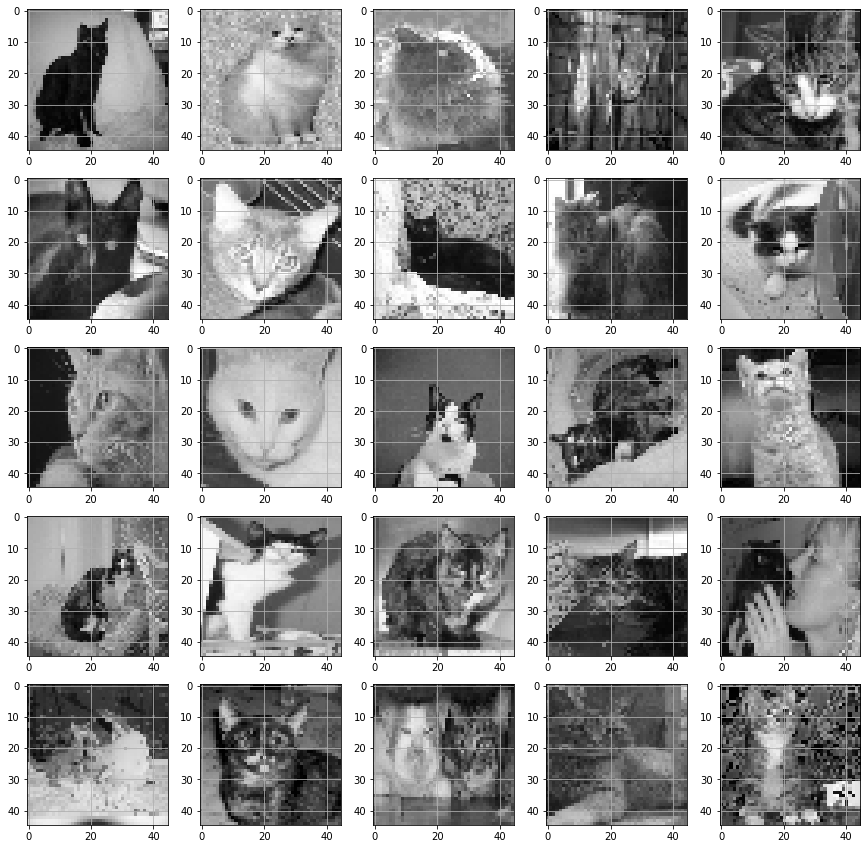

In [5]:
import matplotlib.pyplot as plt
images_cat = np.array(images_cat)
plt.figure()
plt.figure(figsize=(15,15))
for i in range(25):
  rand_no = np.random.randint(0,len(images_cat))
  plt.subplot(5,5,i+1)  
  plt.imshow(images_cat[rand_no], cmap='gray', vmin=0, vmax=255)
  plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

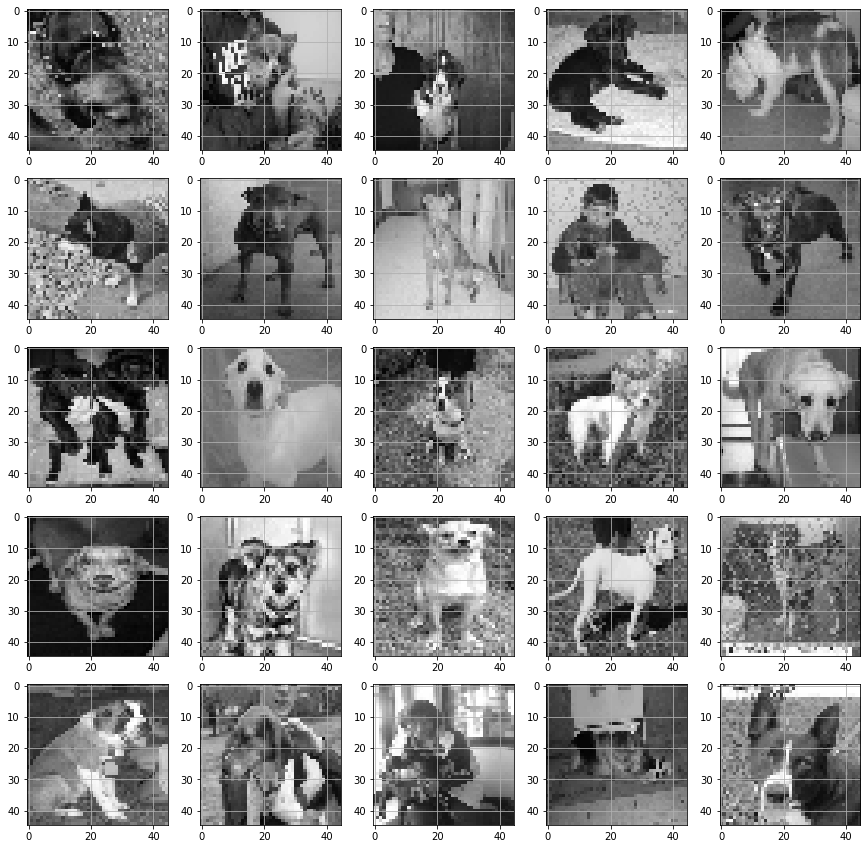

In [6]:
images_dog = np.array(images_dog)
plt.figure()
plt.figure(figsize=(15,15))
for i in range(25):
  rand_no = np.random.randint(0,len(images_dog))
  plt.subplot(5,5,i+1)  
  plt.imshow(images_dog[rand_no], cmap='gray', vmin=0, vmax=255)
  plt.grid(True)
plt.show()

# Data Preprocessing

In [7]:
#reshape data
images_cats = images_cat.reshape(images_cat.shape[0], 2025)
images_cats = pd.DataFrame(images_cats)
images_dogs = images_dog.reshape(images_cat.shape[0], 2025)
images_dogs = pd.DataFrame(images_dogs)

In [8]:
#add labels
images_cats[2025] = 0
images_dogs[2025] = 1
data = pd.concat((images_cats, images_dogs))

In [9]:
#define preprocesses
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
preprocessing = Pipeline([
    ("scaler", StandardScaler()), 
    ("pca", PCA(0.8))
])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = [2025]), data[2025], test_size=0.2, random_state=42)

In [11]:
x_train_reduced = preprocessing.fit_transform(x_train)
x_test_reduced = preprocessing.transform(x_test)

In [12]:
x_train_reduced.shape

(19998, 70)

In [15]:
#Knn classifier
knn_clf = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(2, 20))
grid_knn_clf = GridSearchCV(knn_clf, param_grid, cv=3)
grid_knn_clf.fit(x_train_reduced,y_train)
print(np.mean(grid_knn_clf.best_score_))
print(grid_knn_clf.best_params_)

0.607910791079108
{'n_neighbors': 18}


In [18]:
forest_clf = RandomForestClassifier(random_state=42)
scores = cross_validate(forest_clf, x_train_reduced,  y_train, scoring="accuracy", cv=5)
print(np.mean(scores['test_score']))

0.6172618529632409


In [19]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=150)),
    ("log_reg", LogisticRegression( max_iter = 10000))
])
scores = cross_validate(pipeline, x_train_reduced,  y_train, scoring="accuracy", cv=2)
print(np.mean(scores['test_score']))

0.6138113811381138


In [21]:
xgb_clf = xgb.XGBClassifier(eval_set=[(x_train_reduced, y_train)], early_stopping_rounds=2,eval_metric = 'mlogloss')
scores = cross_validate(xgb_clf, x_train_reduced,  y_train, scoring="accuracy", cv=5)
print(np.mean(scores['test_score']))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.6218627156789197


In [25]:
xgb_clf.fit(x_train_reduced,  y_train)
y_pred = xgb_clf.predict(x_test_reduced)
print("The accuracy is:",accuracy_score(y_test, y_pred))

[22:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy is: 0.6358
